# Performance of SVMs in Large Datasets

The main idea of this document is to evaluate and analyze the behavior of support vector machines in large datasets and implement some alternative methods such as Cascade SVMs, Bagging-Like SVMs adn Stepwise Baggind SVMs. 

_(Some other methods can be added)_

In [8]:
#Loading all the required libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import scipy as sc
import random as rd
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn import datasets,svm,metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.utils.multiclass import unique_labels
from sklearn.datasets import load_digits
from sklearn import preprocessing
import matplotlib.pylab as plt

## MNIST Digits Dataset

Let's use the MNIST dataset as a first example and let's check the size of the dataset and the dimension of the input space.

In [3]:
#Loading train and test datasets
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
print('The shape of train images is ' + np.str(train_images.shape))
print('The shape of test images is ' + np.str(test_images.shape))

The shape of train images is (60000, 28, 28)
The shape of test images is (10000, 28, 28)


In [4]:
#Normalizing pixels, so the take values from 0 to 1
train_images, test_images = train_images/255.0, test_images/255.0

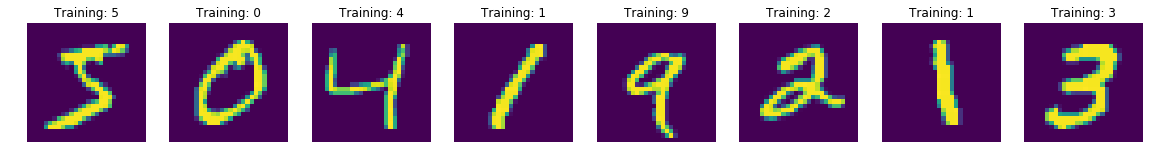

In [5]:
#Let's visualizate the digits (the first n digits)
n = 8
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.axis('off')
    plt.imshow(train_images[i,:].reshape((28,28)))
    plt.title('Training: %i' % train_labels[i]) 

In [6]:
#How many labels there are? 10: the digits from 0 to 9
size_labels = len(np.unique(train_labels)) ; size_labels

10

In [68]:
#We have to reshape the data (extend the pixels in one arrange)
train_images_svm = train_images.reshape(len(train_images), 28*28)
test_images_svm = test_images.reshape(len(test_images), 28*28)
print('The shape of train images is ' + np.str(train_images_svm.shape))
print('The shape of test images is ' + np.str(test_images_svm.shape))

The shape of train images is (60000, 784)
The shape of test images is (10000, 784)


## SVMs Performance and Analysis

The main idea of this section is to see the behavior of regular SVMs in diferent subsamples of the original data.

In [64]:
#We generate a random order of the sample 
random_order = rd.sample(range(len(train_images_svm)), len(train_images_svm))
np.sort(random_order)

array([    0,     1,     2, ..., 59997, 59998, 59999])

In [67]:
#Pick a number multiple of len(train_images_svm)=60000
size_subsample = 1000
total_of_subsamples = np.int(len(train_images_svm)/size_subsample) ; total_of_subsamples

60

In [99]:
#We pick one subsample of size size_subsample and evaluate it doing SVMs
number_of_subsample = rd.randint(0,total_of_subsamples-1) 
first = number_of_subsample*size_subsample
last = (number_of_subsample+1)*size_subsample
values = random_order[first:last]

train_subsample_images = train_images_svm[values,:]
train_subsample_labels = train_labels[values]
train_subsample_images.shape

(1000, 784)

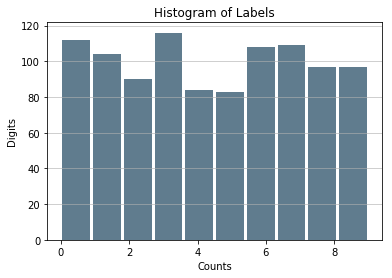

In [104]:
#Histogram of the labels. The idea is to veirfy that the digits are balanced
train_subsample_labels_pd = pd.DataFrame(train_subsample_labels)
train_subsample_labels_pd.plot.hist(grid=False, bins=10, rwidth=0.9, color='#607c8e', legend=None)
plt.title('Histogram of Labels')
plt.xlabel('Counts')
plt.ylabel('Digits')
plt.grid(axis='y', alpha=0.75)
plt.show()